In [1]:
import pandas as pd

In [5]:
paths = ['test_lgbm_baseline_5fold_seed777_plus.csv','test_lgbm_dart_baseline_5fold_seed777.csv']
dfs1 = [pd.read_csv(x) for x in paths]
dfs1.append(pd.read_excel('2catboost_test.xlsx'))

In [6]:
def func(x: str) -> int:
    return int(x[-16:], 16)
dfs1[0]['ID'] = dfs1[0]['customer_ID'].map(func)
dfs1[1]['ID'] = dfs1[1]['customer_ID'].map(func)
df_dict = dfs1[0][['ID', 'customer_ID']]

In [7]:
dfs1[1] = dfs1[1].rename(columns = {'prediction': 'prediction1'})
dfs1[1]

,customer_ID,prediction1,ID
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.026446,8717704911770597815
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.000779,4783907996972277493
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.035278,4616129756878093544
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.168498,16530238486343767700
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.866264,7583456031722841431
...,...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,0.012625,6937247370370204702
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,0.827052,17350748572780376749
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,0.414372,674735392150270193
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,0.232297,3353833074890263815


In [8]:
dfs1[2] = pd.concat([dfs1[2], dfs1[0].sort_values(by = ['ID'])['customer_ID'].reset_index(drop = True)],axis = 1).fillna(method = 'ffill', axis = 1)

In [9]:
df_test = pd.concat([dfs1[2],  dfs1[0].sort_values(by = ['ID'])['prediction'].reset_index(drop = True), dfs1[1].sort_values(by = ['ID'])['prediction1'].reset_index(drop = True)], axis = 1)

In [10]:
df_test

,ID,1,2,3,4,5,6,7,8,9,10,11,12,13,customer_ID,prediction,prediction1
0,63146778244,0.132074,0.039873,0.041958,0.025651,0.06433,0.024889,0.028701,0.03152,0.010885,0.021725,0.020255,0.019267,0.018168,786a7d05fc037de81fc6934ffc11b06533089c1a570a86...,0.007955,0.008468
1,4712478813452,0.595722,0.391934,0.297394,0.18584,0.245264,0.293699,0.219079,0.298839,0.687404,0.2774,0.26983,0.366109,0.15115,99b3d0408f916a84a67988c71eb9b1501e85541394fce1...,0.109775,0.112354
2,10045695118710,0.48522,0.445734,0.548297,0.613007,0.701971,0.599064,0.663253,0.828905,0.765448,0.808276,0.574114,0.626039,0.550982,82ab998d1de7ec4abe8be792277e36f0eb823039c10998...,0.618584,0.608792
3,24584914086599,0.453849,0.339948,0.491454,0.737115,0.699424,0.587829,0.664056,0.466511,0.615977,0.536524,0.534864,0.375615,0.337228,df84e4edef8aad8f7ae94a163483065bfc282d60dd5846...,0.316912,0.306072
4,25718247626061,0.00732,0.005519,0.003861,0.002846,0.004136,0.00382,0.001945,0.00304,0.002577,0.002552,0.002627,0.002574,0.003198,be6e423c9efd2763c06f122841b93bff61a449fff7122f...,0.001008,0.001074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924616,18446691153987309568,0.00795,0.016603,0.013784,0.008343,0.007377,0.008953,0.003295,0.006506,0.004231,0.004134,0.002913,0.001608,0.003116,795368bbfa7b9007c50580960164ef265c7f0db69c1868...,0.002118,0.002009
924617,18446702931748679680,0.001535,0.001757,0.002018,0.004542,0.001321,0.00233,0.001151,0.001185,0.002984,0.003953,0.003935,0.004549,0.004641,5b7c359b9890f12ba2c17ec4277b4a3163ee1aa1619ea9...,0.001536,0.001245
924618,18446710860663560192,0.066898,0.063699,0.17283,0.162169,0.206653,0.479547,0.356645,0.51851,0.28215,0.301355,0.28731,0.090731,0.090664,77c929caaab6ee9606b0b34470745bd12698f076cd448b...,0.129745,0.130288
924619,18446711164465819648,0.023148,0.026991,0.022571,0.00907,0.010278,0.016836,0.013737,0.012188,0.019453,0.02112,0.012403,0.007393,0.010618,ad9cba0affd556fcfa8b1ae63c7b0ed95a1ca73b890675...,0.005460,0.005150


In [11]:
test = df_test.drop(columns = ['ID', 'customer_ID'])
test

,1,2,3,4,5,6,7,8,9,10,11,12,13,prediction,prediction1
0,0.132074,0.039873,0.041958,0.025651,0.06433,0.024889,0.028701,0.03152,0.010885,0.021725,0.020255,0.019267,0.018168,0.007955,0.008468
1,0.595722,0.391934,0.297394,0.18584,0.245264,0.293699,0.219079,0.298839,0.687404,0.2774,0.26983,0.366109,0.15115,0.109775,0.112354
2,0.48522,0.445734,0.548297,0.613007,0.701971,0.599064,0.663253,0.828905,0.765448,0.808276,0.574114,0.626039,0.550982,0.618584,0.608792
3,0.453849,0.339948,0.491454,0.737115,0.699424,0.587829,0.664056,0.466511,0.615977,0.536524,0.534864,0.375615,0.337228,0.316912,0.306072
4,0.00732,0.005519,0.003861,0.002846,0.004136,0.00382,0.001945,0.00304,0.002577,0.002552,0.002627,0.002574,0.003198,0.001008,0.001074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924616,0.00795,0.016603,0.013784,0.008343,0.007377,0.008953,0.003295,0.006506,0.004231,0.004134,0.002913,0.001608,0.003116,0.002118,0.002009
924617,0.001535,0.001757,0.002018,0.004542,0.001321,0.00233,0.001151,0.001185,0.002984,0.003953,0.003935,0.004549,0.004641,0.001536,0.001245
924618,0.066898,0.063699,0.17283,0.162169,0.206653,0.479547,0.356645,0.51851,0.28215,0.301355,0.28731,0.090731,0.090664,0.129745,0.130288
924619,0.023148,0.026991,0.022571,0.00907,0.010278,0.016836,0.013737,0.012188,0.019453,0.02112,0.012403,0.007393,0.010618,0.005460,0.005150


In [12]:
dfs_test

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.029337
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.000795
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.033651
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.172486
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.869924
...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,0.012793
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,0.827551
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,0.430044
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,0.247839


In [13]:
def func(x: str) -> int:
    return int(x[-16:], 16)
dfs_test['ID'] = dfs_test['customer_ID'].map(func)

In [14]:
dfs_test

,customer_ID,prediction,ID
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.029337,8717704911770597815
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.000795,4783907996972277493
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.033651,4616129756878093544
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.172486,16530238486343767700
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.869924,7583456031722841431
...,...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,0.012793,6937247370370204702
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,0.827551,17350748572780376749
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,0.430044,674735392150270193
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,0.247839,3353833074890263815


In [128]:
w = [0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.205, 0.777]

In [141]:
w = [0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.4, 0.582]

In [ ]:
w = [0.005, 0.005, 0.005, 0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.435,0.5]

In [142]:
w

[0.002,
 0.002,
 0.002,
 0.002,
 0.002,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.4,
 0.582]

In [143]:
res = pd.DataFrame({'prediction':test@w})

In [144]:
res = pd.concat([df_test['customer_ID'], res], axis = 1)

In [145]:
res

,customer_ID,prediction
0,786a7d05fc037de81fc6934ffc11b06533089c1a570a86...,0.008893
1,99b3d0408f916a84a67988c71eb9b1501e85541394fce1...,0.115296
2,82ab998d1de7ec4abe8be792277e36f0eb823039c10998...,0.612755
3,df84e4edef8aad8f7ae94a163483065bfc282d60dd5846...,0.314461
4,be6e423c9efd2763c06f122841b93bff61a449fff7122f...,0.001098
...,...,...
924616,795368bbfa7b9007c50580960164ef265c7f0db69c1868...,0.002159
924617,5b7c359b9890f12ba2c17ec4277b4a3163ee1aa1619ea9...,0.001386
924618,77c929caaab6ee9606b0b34470745bd12698f076cd448b...,0.131477
924619,ad9cba0affd556fcfa8b1ae63c7b0ed95a1ca73b890675...,0.005479


In [146]:
res.sort_values(by = ['customer_ID']).to_csv('best_of_the_best_v2.csv',index=False)

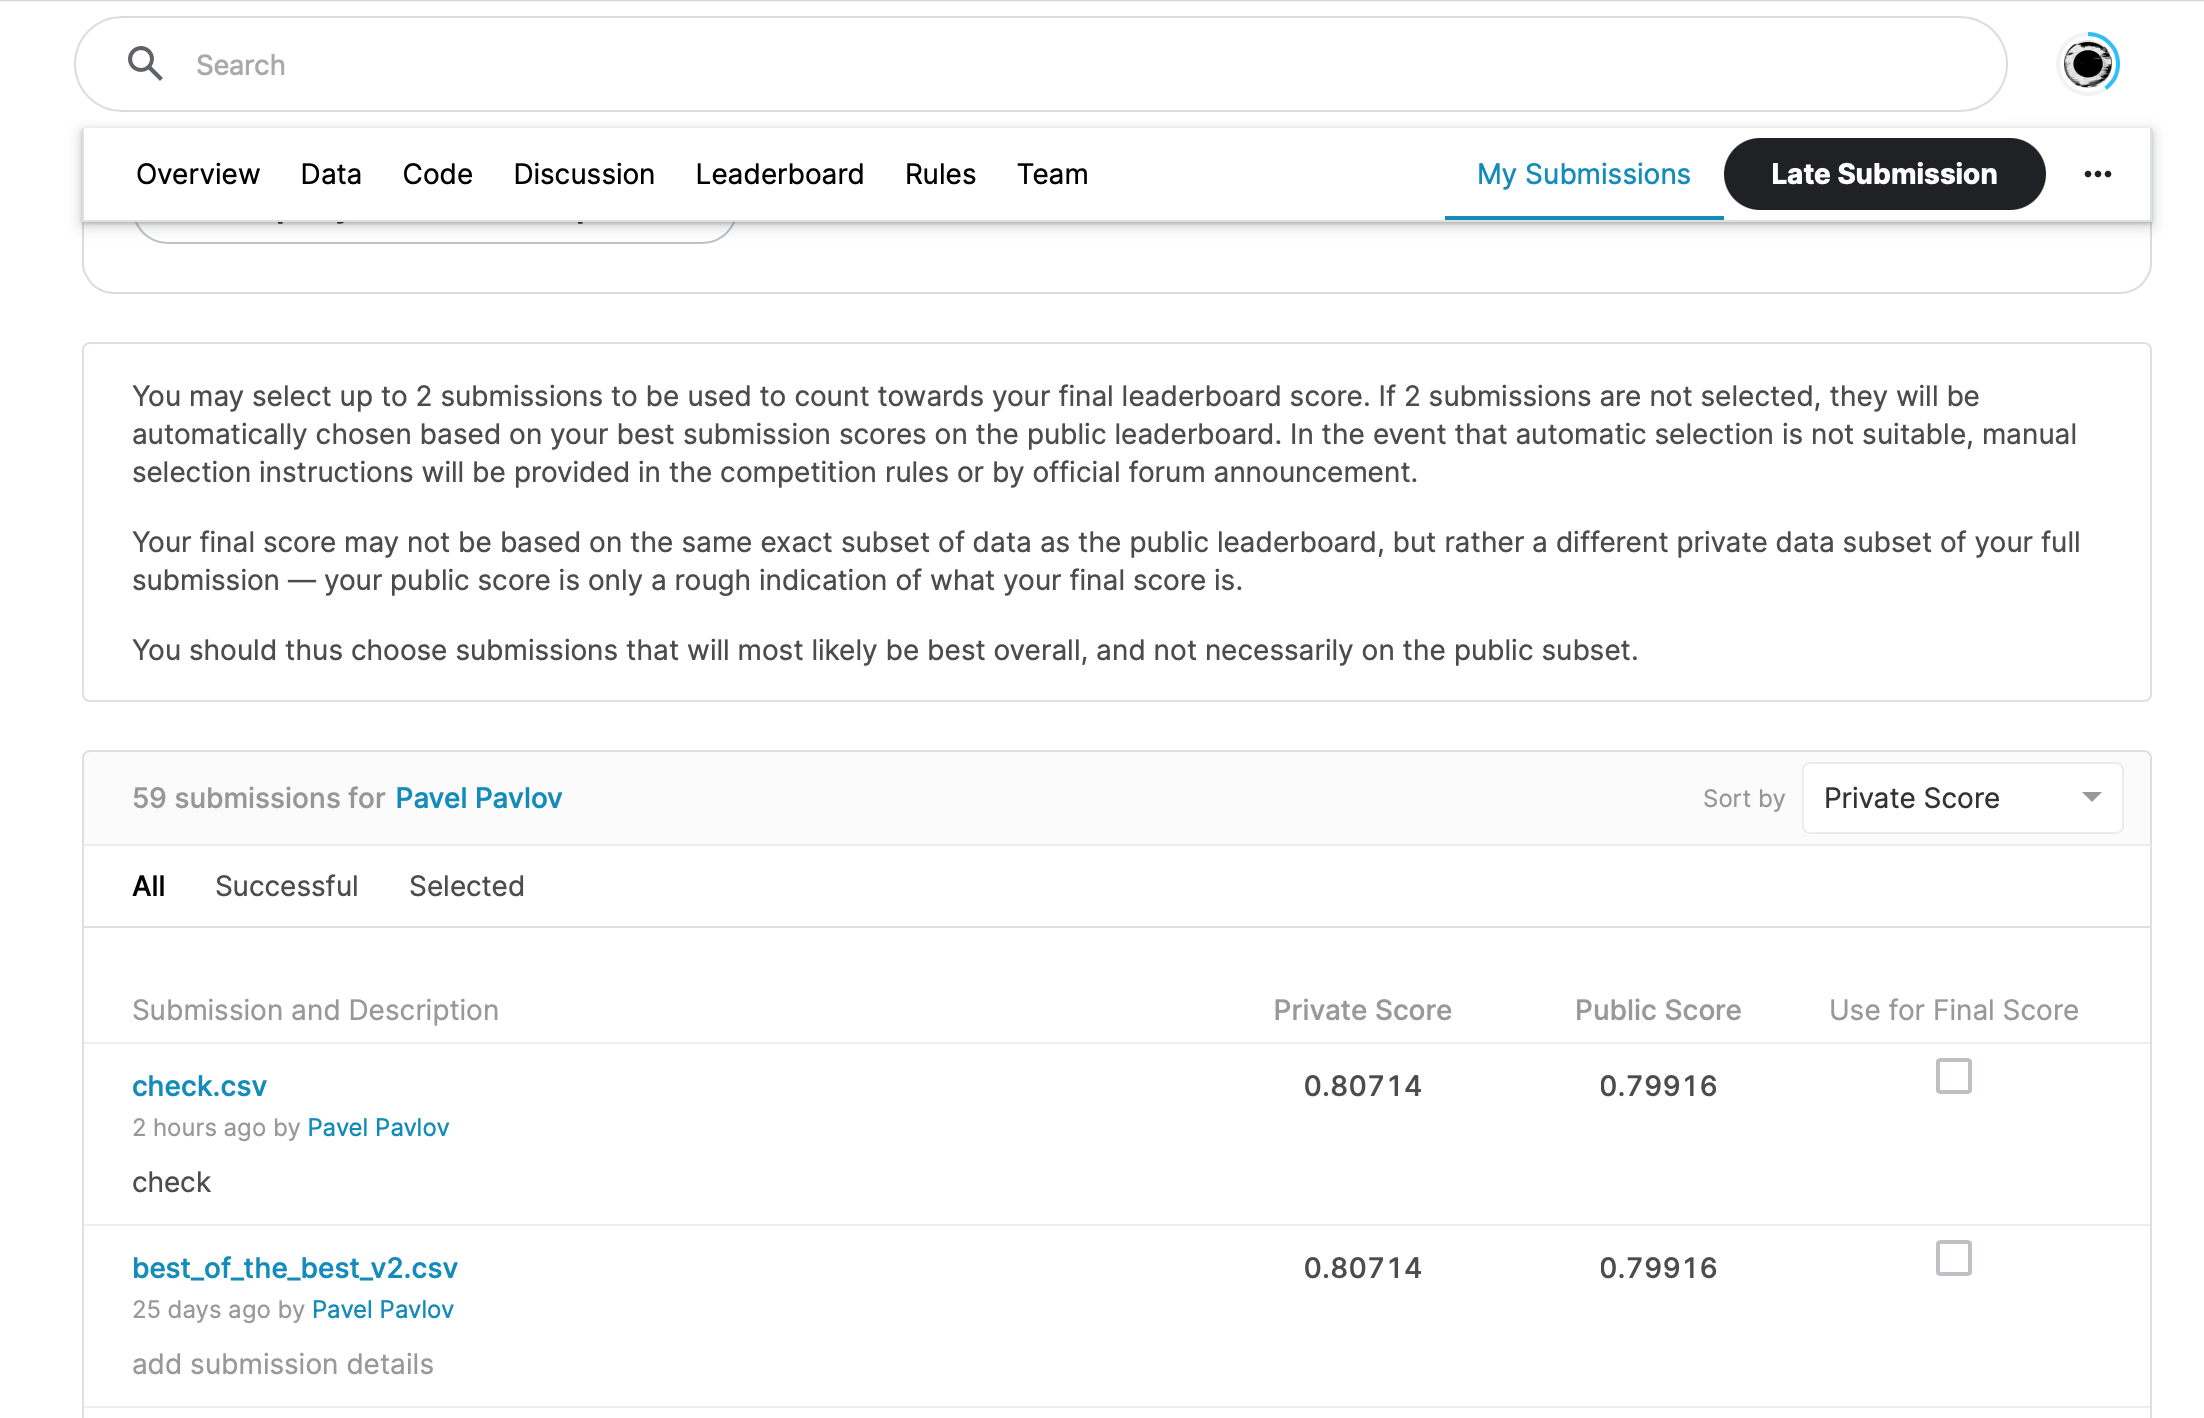

In [3]:
from IPython.display import Image
Image(filename = 'picture.png', width = 800, height = 400)